In [29]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, LogLocator
# Load the JSON file
data = pd.read_json('../generated/VUEs.json')

# Convert to a DataFrame
df = pd.DataFrame(data)

# Normalize the 'revisedProteinEffects' column
normalized_dfs = []
for index, row in df.iterrows():
    normalized_row = pd.json_normalize(row['revisedProteinEffects'])
    print(normalized_row)

                    variant  \
0  4:g.55593576_55593606del   
1  4:g.55593580_55593606del   
2  4:g.55593578_55593606del   

                                     genomicLocation     transcriptId  \
0  4,55593576,55593606,CCACAGAAACCCATGTATGAAGTACA...  ENST00000288135   
1  4,55593580,55593606,AGAAACCCATGTATGAAGTACAGTGGA,-  ENST00000288135   
2  4,55593578,55593606,ACAGAAACCCATGTATGAAGTACAGT...  ENST00000288135   

  vepPredictedProteinEffect vepPredictedVariantClassification  \
0             p.X550_splice                       Splice_Site   
1             p.X550_splice                       Splice_Site   
2             p.X550_splice                       Splice_Site   

  revisedProteinEffect     revisedVariantClassification  \
0       p.K550_K558del  Splice_Exon_Shortening_In_Frame   
1       p.K550_K558del  Splice_Exon_Shortening_In_Frame   
2       p.K550_K558del  Splice_Exon_Shortening_In_Frame   

  revisedStandardVariantClassification                               hgvsc  \
0     

In [30]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, LogLocator

# Load the JSON file
data = pd.read_json('../generated/VUEs.json')

# Convert to a DataFrame
df = pd.DataFrame(data)


# Normalize the 'revisedProteinEffects' column
normalized_dfs = []
for index, row in df.iterrows():
    normalized_row = pd.json_normalize(row['revisedProteinEffects'])
    repeated_row = pd.DataFrame([row.drop('revisedProteinEffects')] * len(normalized_row)).reset_index(drop=True)
    combined = pd.concat([repeated_row.reset_index(drop=True), normalized_row], axis=1).reset_index(drop=True)
    normalized_dfs.append(combined)

# Determine the union of all column names
all_columns = set()
for df in normalized_dfs:
    all_columns.update(df.columns)

# Reindex each DataFrame to include all columns, filling missing values with NaN
all_columns = list(all_columns)
for i, df in enumerate(normalized_dfs):
    normalized_dfs[i] = df.loc[:, ~df.columns.duplicated()].reindex(columns=all_columns)

# Concatenate all normalized DataFrames
result_df = pd.concat(normalized_dfs, ignore_index=True)
# make anything CountByVariantCount 0
count_cancer_type_columns = [col for col in result_df.columns if 'CountByCancerType' in col]
result_df[count_cancer_type_columns] = result_df[count_cancer_type_columns].fillna(0).astype(int)

In [36]:
# hardcoded set o fgene swith highest level (manually determined with
# mutationmapper, and just looking upn genes in OncoKB)
highest_level_per_gene = {
    "KIT": "Level 1",
    "MET": "Level 1",
    "FLT3": "Level 1",
    "ATM": "Level 1",
    "BRCA1": "Level 1",
    "BRCA2": "Level 1",
    "BRIP1": "Level 1",
    "CHEK2": "Level 1",
    "PALB2": "Level 1",
    "RAD51D": "Level 1",
    "MLH1": "Level 1",
    "EGFR": "Level 1",
    # "KRAS": "Level 2",
}

In [37]:
result_df

,therapeuticLevel,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Hepatobiliary Cancer,counts.genie.somaticVariantsCount,counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Prostate Cancer,counts.mskimpact.somaticVariantsCountByCancerType.Gastrointestinal Stromal Tumor,counts.mskimpact.somaticVariantsCount,counts.genie.somaticVariantsCountByCancerType.Glioma,counts.genie.somaticVariantsCountByCancerType.Leukemia,counts.total.somaticVariantsCountByCancerType.Glioma,counts.mskimpact.germlineVariantsCountByCancerType.Pancreatic Cancer,...,counts.mskimpact.germlineVariantsCountByCancerType.Tubular Adenoma of the Colon,variantNote,counts.tcga.unknownVariantsCountByCancerType.Adrenocortical Carcinoma,counts.total.somaticVariantsCountByCancerType.Leukemia,counts.total.germlineVariantsCountByCancerType.Melanoma,counts.total.germlineVariantsCountByCancerType.Pancreatic Cancer,counts.mskimpact.germlineVariantsCountByCancerType.Retinoblastoma,counts.total.somaticVariantsCountByCancerType.Appendiceal Cancer,counts.mskimpact.somaticVariantsCountByCancerType.Endometrial Cancer,counts.total.somaticVariantsCountByCancerType.Tubular Adenoma of the Colon
0,LEVEL_1,0,3.0,0,3,3.0,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
1,LEVEL_1,0,8.0,0,5,5.0,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
2,LEVEL_1,0,5.0,0,3,3.0,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
3,None,0,191.0,0,0,0.0,0,0,0,0,...,0,NaN,0,0,0,0,0,1,0,4
4,None,0,0.0,0,0,0.0,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,None,0,0.0,0,0,0.0,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
106,None,0,0.0,0,0,0.0,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
107,None,0,0.0,0,0,0.0,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0
108,None,0,1.0,0,0,0.0,0,0,0,0,...,0,NaN,0,0,0,0,0,0,0,0


In [38]:

print(set([c for c in result_df.columns if "CancerType" in c]))

{'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Hepatobiliary Cancer', 'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Prostate Cancer', 'counts.mskimpact.somaticVariantsCountByCancerType.Gastrointestinal Stromal Tumor', 'counts.genie.somaticVariantsCountByCancerType.Leukemia', 'counts.genie.somaticVariantsCountByCancerType.Glioma', 'counts.total.somaticVariantsCountByCancerType.Glioma', 'counts.mskimpact.germlineVariantsCountByCancerType.Pancreatic Cancer', 'counts.genie.somaticVariantsCountByCancerType.Ampullary Cancer', 'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Breast Cancer', 'counts.mskimpact.somaticVariantsCountByCancerType.Ovarian Cancer', 'counts.mskimpact_nonsignedout.somaticVariantsCountByCancerType.Cancer of Unknown Primary', 'counts.total.somaticVariantsCountByCancerType.Adrenocortical Carcinoma', 'counts.genie.somaticVariantsCountByCancerType.Soft Tissue Sarcoma', 'counts.mskimpact.somaticVariantsCountByCancerType.Skin

In [39]:
cancer_types = set([c.split('.')[-1] for c in result_df.columns if "CancerType" in c])
print(len(cancer_types))

46


In [64]:
# Custom function to calculate the sum
def custom_sum(row):
    result = {}
    for study in "tcga mskimpact mskimpact_nonsignedout genie total".split():
        result[study] = (
            row[f'counts.{study}.somaticVariantsCount'].sum() +
            row[f'counts.{study}.germlineVariantsCount'].sum() +
            row[f'counts.{study}.unknownVariantsCount'].sum()
        )
    for cancer_type in cancer_types:
        result[f'counts.CancerType.{cancer_type}'] = 0
        for study in "tcga mskimpact mskimpact_nonsignedout genie".split():
            result[f'counts.CancerType.{cancer_type}'] += (
                row.get(f'counts.{study}.somaticVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
                row.get(f'counts.{study}.germlineVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
                row.get(f'counts.{study}.unknownVariantsCountByCancerType.{cancer_type}', np.array(0)).sum()
            )
    return pd.Series(result)

# Group by 'hugoGeneSymbol' and apply custom function
grouped_df = result_df.groupby('hugoGeneSymbol').apply(custom_sum)

# Add additional columns
grouped_df['Number of VUEs'] = result_df.groupby('hugoGeneSymbol').size()
grouped_df['total_variant_count'] = grouped_df['total']
grouped_df['Highest_Level'] = grouped_df.index.map(highest_level_per_gene).fillna('Oncogenic')
grouped_df.head(50)

,tcga,mskimpact,mskimpact_nonsignedout,genie,total,counts.CancerType.Breast Sarcoma,counts.CancerType.Adrenocortical Carcinoma,counts.CancerType.Anal Cancer,counts.CancerType.Hodgkin Lymphoma,counts.CancerType.Small Bowel Cancer,...,counts.CancerType.mskimpact.Melanoma,counts.CancerType.mskimpact.Retinoblastoma,counts.CancerType.mskimpact.Gastrointestinal Neuroendocrine Tumor,counts.CancerType.mskimpact.Colorectal Cancer,counts.CancerType.mskimpact.Thyroid Cancer,counts.CancerType.mskimpact.Endometrial Cancer,counts.CancerType.mskimpact.Head and Neck Cancer,Number of VUEs,total_variant_count,Highest_Level
hugoGeneSymbol,,,,,,,,,,,,,,,,,,,,,
APC,0.0,1.0,321.0,191.0,513.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,317.0,0.0,0.0,0.0,1,513.0,Oncogenic
ATM,0.0,13.0,3.0,15.0,31.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,10,31.0,Level 1
BAP1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,Oncogenic
BRCA1,0.0,8.0,0.0,10.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,17.0,Level 1
BRCA2,0.0,7.0,2.0,11.0,19.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9,19.0,Level 1
BRIP1,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2.0,Level 1
CDH1,3.0,15.0,1.0,22.0,29.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,3,29.0,Oncogenic
CHEK2,0.0,14.0,0.0,4.0,17.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1,17.0,Level 1
CTNNB1,0.0,15.0,0.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,21,15.0,Oncogenic


In [65]:
# TODO: BAP1 not found (should be in TCGA-B0-4842-01 but it's not there: https://cancer.sanger.ac.uk/cosmic/sample/overview?id=1779818)
# TODO: FLT3 is in heme 3 times (1 sample)
# TODO: RAD51D once in ccle_broad_2019
zero_variant_cases = grouped_df[grouped_df['total'] == 0]
print("There are {} VUEs with 0 variants".format(len(zero_variant_cases)))
print(zero_variant_cases)

There are 0 VUEs with 0 variants
Empty DataFrame
Columns: [tcga, mskimpact, mskimpact_nonsignedout, genie, total, counts.CancerType.Breast Sarcoma, counts.CancerType.Adrenocortical Carcinoma, counts.CancerType.Anal Cancer, counts.CancerType.Hodgkin Lymphoma, counts.CancerType.Small Bowel Cancer, counts.CancerType.Sellar Tumor, counts.CancerType.Bladder Cancer, counts.CancerType.Mesothelioma, counts.CancerType.Mature T and NK Neoplasms, counts.CancerType.Hepatobiliary Cancer, counts.CancerType.Prostate Cancer, counts.CancerType.Ovarian Epithelial Tumor, counts.CancerType.Tubular Adenoma of the Colon, counts.CancerType.Uterine Sarcoma, counts.CancerType.Cancer of Unknown Primary, counts.CancerType.Pancreatic Cancer, counts.CancerType.Peritoneal Cancer, NOS, counts.CancerType.Salivary Gland Cancer, counts.CancerType.Non-Small Cell Lung Cancer, counts.CancerType.Esophagogastric Cancer, counts.CancerType.Renal Clear Cell Carcinoma, counts.CancerType.Breast Cancer, counts.CancerType.B-Lympho

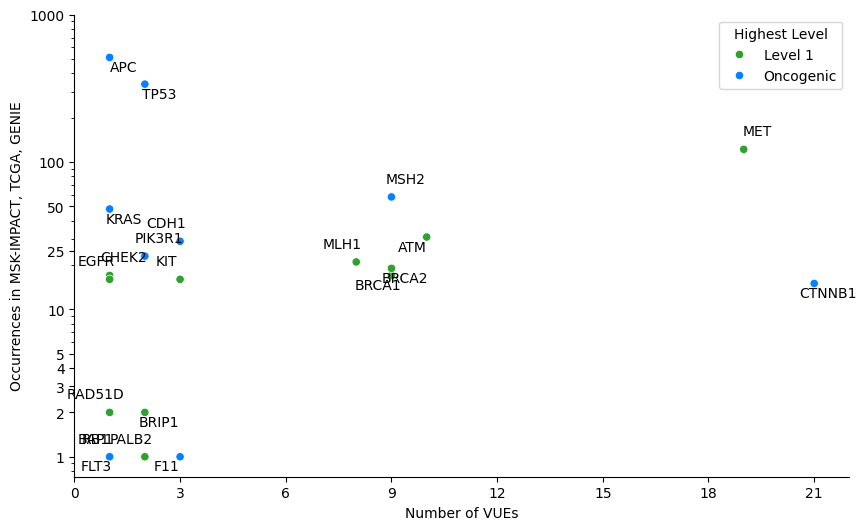

In [60]:
from matplotlib.ticker import MaxNLocator, LogLocator, ScalarFormatter

# Create the scatter plot
plt.figure(figsize=(10, 6))


palette = {"Level 1": "#30A12D", "Level 2": "#1f78b4", "Oncogenic": "#0780FE"}

scatter_plot = sns.scatterplot(data=grouped_df, x='Number of VUEs', y='total_variant_count', hue="Highest_Level", palette=palette)

# Despine the plot
sns.despine()

# Set x-axis to display integers only
scatter_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
# Set y-axis to log scale
scatter_plot.set_yscale('log')
# Manually set y-axis ticks
scatter_plot.set_yticks([1, 2, 3, 4, 5, 10, 25, 50, 100, 1000])
scatter_plot.get_yaxis().set_major_formatter(ScalarFormatter())


# Add labels and title
scatter_plot.set_xlabel('Number of VUEs')
scatter_plot.set_ylabel('Occurrences in MSK-IMPACT, TCGA, GENIE')

# Reorder the legend handles and labels
handles, labels = scatter_plot.get_legend_handles_labels()
handles = [handles[1], handles[0]]  # Swap the order of handles
labels = [labels[1], labels[0]]  # Swap the order of labels
# Update the legend
scatter_plot.legend(handles, labels, title="Highest Level", loc="upper right")

# Add annotations for each point with gene symbols
texts = []
for i, row in grouped_df.iterrows():
    # Add some randomness to the initial text position
    x_offset = np.random.choice([-10,10])
    y_offset = np.random.choice([10, -10])
    texts.append(scatter_plot.annotate(row.name, 
                          (row['Number of VUEs'], row['total']),
                          textcoords="offset points", xytext=(x_offset, y_offset), ha='center', fontsize=10))

plt.savefig("revue_occurrence_plot.svg", format='svg')

# Show the plot
plt.show()


In [20]:
cancer_type_counts = pd.read_csv('./cancer_type_revue_counts.txt', sep='\t').groupby('Cancer Type')['Patient ID'].nunique()
cancer_type_counts.head()

Cancer Type
Acute myeloid leukemia       16
Adenocarcinoma In Situ        4
Adrenal Gland Cancer          2
Adrenocortical Adenoma        6
Adrenocortical Carcinoma    212
Name: Patient ID, dtype: int64

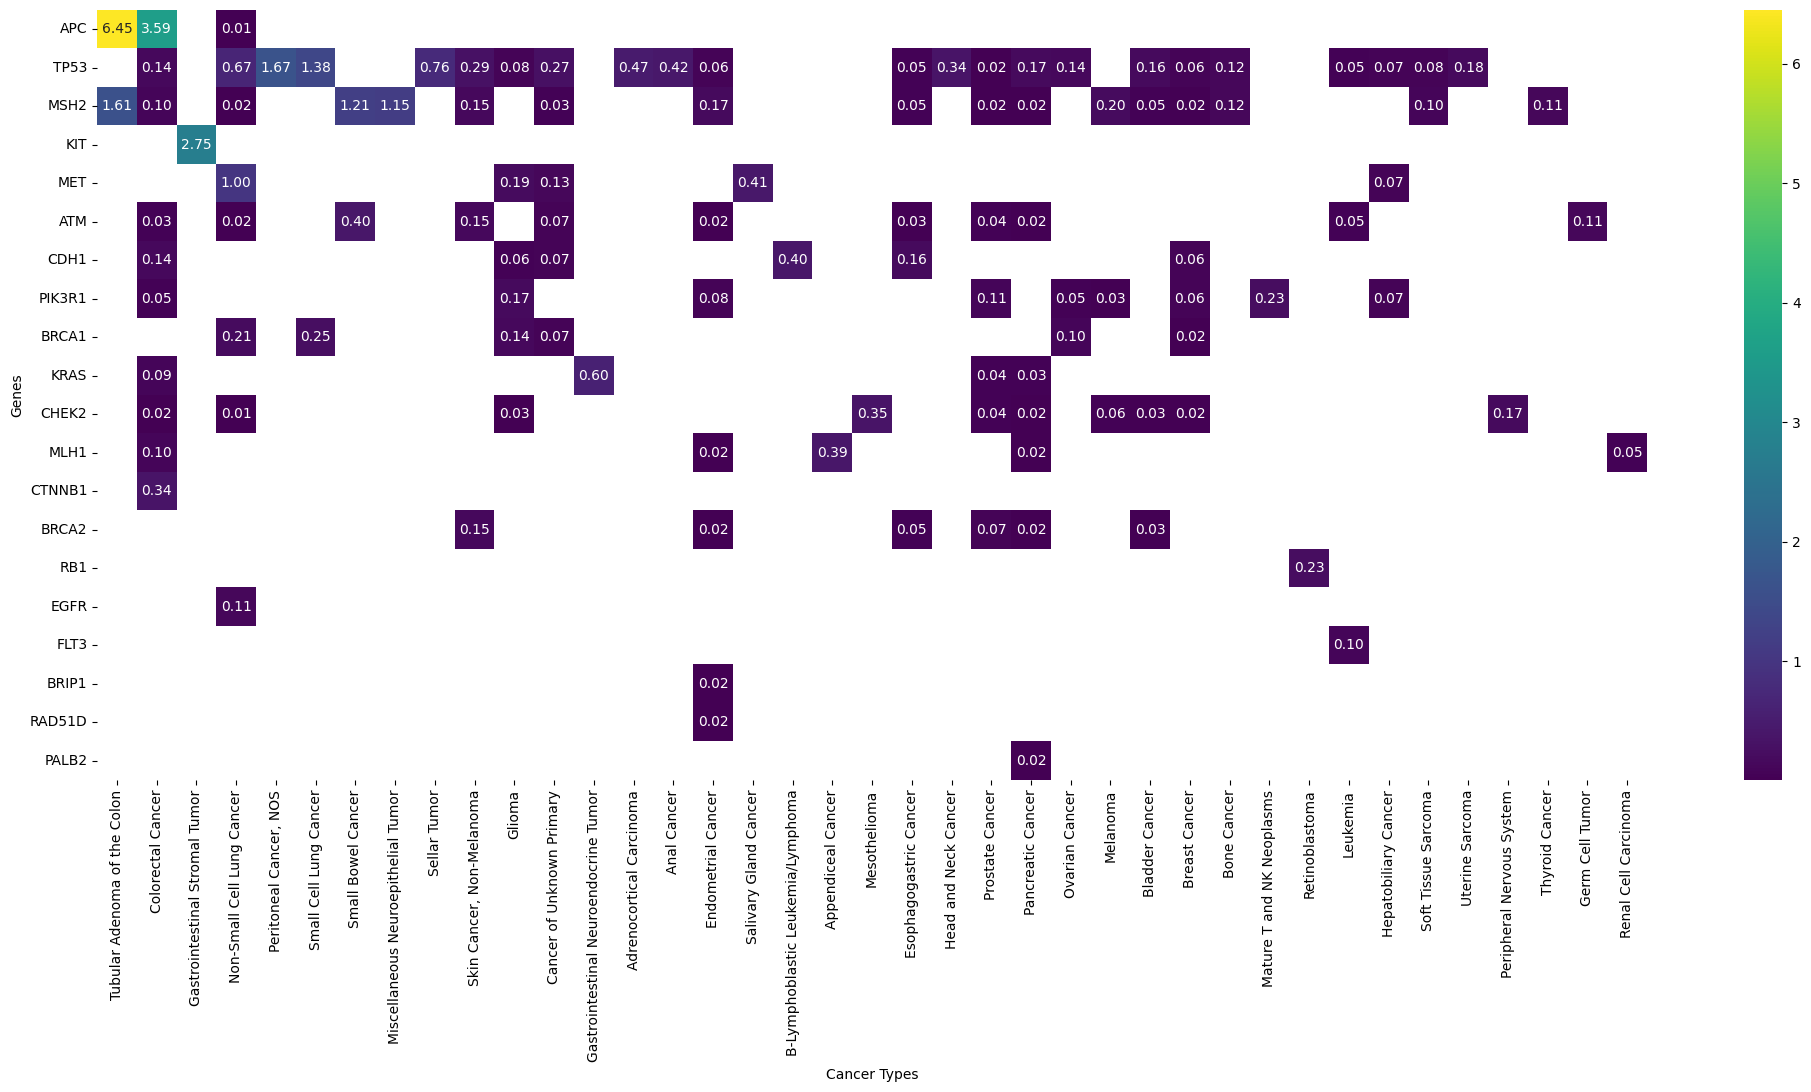

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming grouped_df is already created and contains the necessary data

# Extract the relevant columns for the heatmap
heatmap_data = grouped_df.filter(like='counts.CancerType')
heatmap_data.columns = [col.replace('counts.CancerType.', '') for col in heatmap_data.columns]

# Pivot the DataFrame to have genes as columns and cancer types as rows
heatmap_data = heatmap_data

# Filter out rows that sum up to 0
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1) != 0]

# Normalize the counts by the total counts for each cancer type using cancer_type_counts
for col in heatmap_data.columns:
    heatmap_data[col] = heatmap_data[col] * 100.0 / cancer_type_counts.loc[col]

# Sort the rows and columns by the sum of their values
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]
heatmap_data = heatmap_data[heatmap_data.sum(axis=0).sort_values(ascending=False).index]

# Create a mask for cells that are 0
mask = heatmap_data == 0

# Plot the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', mask=mask)
# plt.title('Heatmap of Genes vs Cancer Types')
plt.xlabel('Cancer Types')
plt.ylabel('Genes')
plt.show()

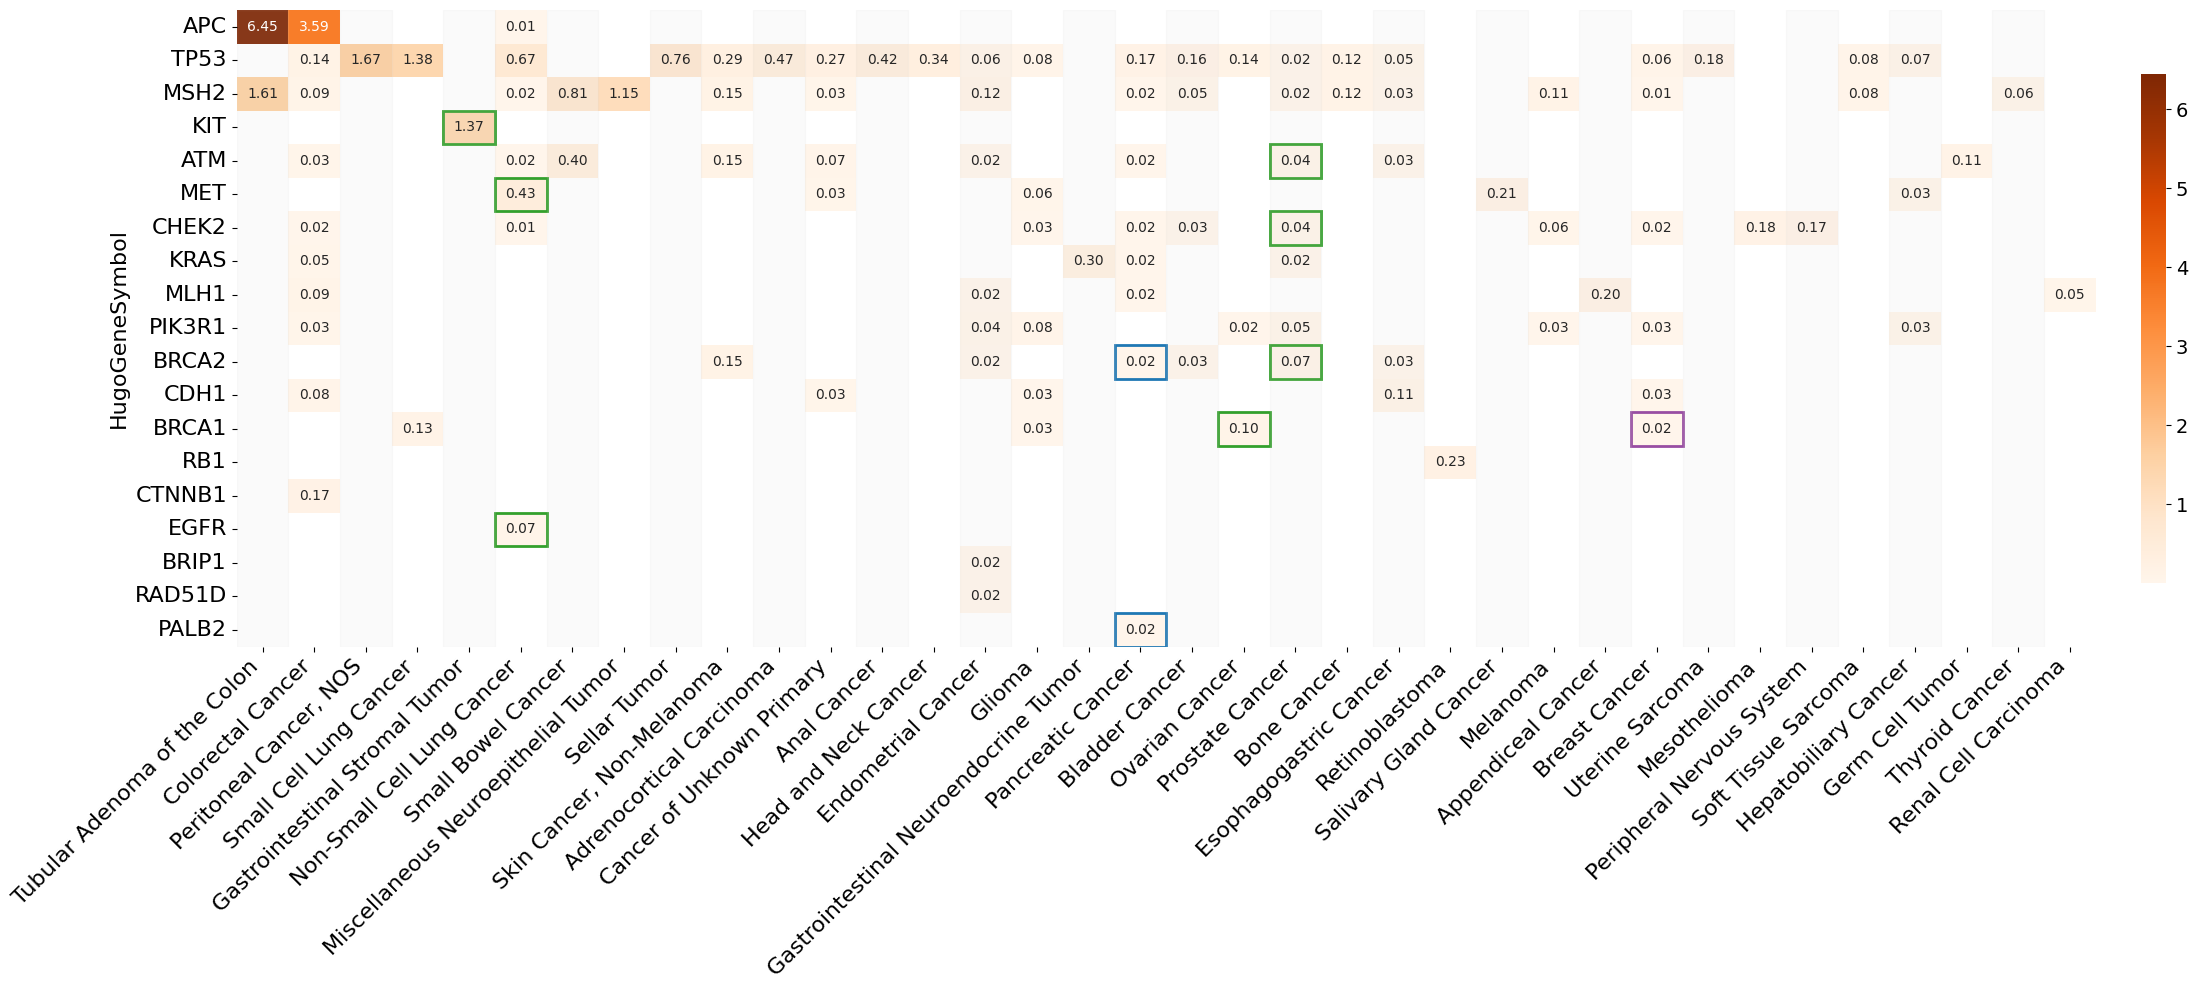

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd


level_palette = {
    'Level 1': '#33A02C',
    'Level 2': '#1F78B4',
    'Level 3A': '#984EA3',
    'Level 3B': '#BE98CE',
    'Level 4': '#424242',
    'R1': '#EE3424',
    'R2': '#F79A92',
    'R3': '#FCD6D3' 
}

highlight_map = {
    'APC': {},
    'ATM': {'Prostate Cancer': 'Level 1'},
    'BAP1': {},
    'BRCA1': {
        'Prostate Cancer': 'Level 1',
        'Ovarian Cancer': 'Level 1',
        'Pancreatic Cancer': 'Level 2',
        'Breast Cancer': 'Level 3A'
    },
    'BRCA2': {
        'Prostate Cancer': 'Level 1',
        'Ovarian Cancer': 'Level 1',
        'Pancreatic Cancer': 'Level 2',
        'Uterine Sarcoma': 'Level 1',
        'Breast Cancer': 'Level 3A'
    },
    'BRIP1': {'Prostate Cancer': 'Level 1'},
    'CDH1': {},
    'CHEK2': {'Prostate Cancer': 'Level 1'},
    'CTNNB1': {},
    'EGFR': {
        'Non-Small Cell Lung Cancer': 'Level 1',
        'Esophagogastric Cancer': 'Level 3A',
        'Glioma': 'Level 4',
        'Colorectal Cancer': 'R2'
    },
    'F11': {},
    'FLT3': {'Leukemia': 'Level 1'},
    'KIT': {
        'Gastrointestinal Stromal Tumor': 'Level 1',
        'Mastocytosis': 'Level 1',
        'Melanoma': 'Level 2'
    },
    'KRAS': {},
    'MET': {'Non-Small Cell Lung Cancer': 'Level 1'},
    'MLH1': {'Prostate Cancer': 'Level 1'},
    'MSH2': {},
    'PALB2': {
        'Prostate Cancer': 'Level 1',
        'Pancreatic Cancer': 'Level 2'
    },
    'PIK3R1': {},
    'RAD51D': {'Prostate Cancer': 'Level 1'},
    'RB1': {},
    'TP53': {}
}

def mskimpact_sum(row):
    result = {}
    for cancer_type in cancer_types:
        result[f'counts.CancerType.{cancer_type}'] = 0
        result[f'counts.CancerType.{cancer_type}'] += (
            row.get(f'counts.total.somaticVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
            row.get(f'counts.total.germlineVariantsCountByCancerType.{cancer_type}', np.array(0)).sum() +
            row.get(f'counts.total.unknownVariantsCountByCancerType.{cancer_type}', np.array(0)).sum()
        )
    return pd.Series(result)

# process mskimapct only
df = pd.DataFrame(pd.read_json('./VUEs_mskimpact_count.json'))

# Normalize the 'revisedProteinEffects' column
normalized_dfs = []
for index, row in df.iterrows():
    normalized_row = pd.json_normalize(row['revisedProteinEffects'])
    repeated_row = pd.DataFrame([row.drop('revisedProteinEffects')] * len(normalized_row)).reset_index(drop=True)
    combined = pd.concat([repeated_row.reset_index(drop=True), normalized_row], axis=1).reset_index(drop=True)
    normalized_dfs.append(combined)

# Determine the union of all column names
all_columns = set()
for df in normalized_dfs:
    all_columns.update(df.columns)

# Reindex each DataFrame to include all columns, filling missing values with NaN
all_columns = list(all_columns)
for i, df in enumerate(normalized_dfs):
    normalized_dfs[i] = df.loc[:, ~df.columns.duplicated()].reindex(columns=all_columns)

# Concatenate all normalized DataFrames
mskimpact_by_cancertype_df = pd.concat(normalized_dfs, ignore_index=True)
# make anything CountByVariantCount 0
count_cancer_type_columns = [col for col in mskimpact_by_cancertype_df.columns if 'CountByCancerType' in col]
mskimpact_by_cancertype_df[count_cancer_type_columns] = mskimpact_by_cancertype_df[count_cancer_type_columns].fillna(0).astype(int)
cancer_types = set([c.split('.')[-1] for c in mskimpact_by_cancertype_df.columns if "CancerType" in c])

# Group by 'hugoGeneSymbol' and apply custom function
grouped_df = mskimpact_by_cancertype_df.groupby('hugoGeneSymbol').apply(mskimpact_sum)


heatmap_data = grouped_df.filter(like='counts.CancerType.')
heatmap_data.columns = [col.replace('counts.CancerType.', '') for col in heatmap_data.columns]
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1) != 0]
heatmap_data.head(50)
for col in heatmap_data.columns:
    heatmap_data[col] = heatmap_data[col] * 100.0 / cancer_type_counts.loc[col]

heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]
heatmap_data = heatmap_data[heatmap_data.sum(axis=0).sort_values(ascending=False).index]

# Plot the heatmap
plt.figure(figsize=(25, 10))
# add n=10 to the x axis lables of the heatmap
ax = sns.heatmap(heatmap_data, cmap='Oranges', annot=True, fmt='.2f', mask=heatmap_data == 0, annot_kws={"fontsize": 10}, cbar_kws={'shrink': 0.8, 'pad': 0.02} )
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=14)

# Overlay colored boxes for matching gene × cancer_type × level
for row_idx, gene in enumerate(heatmap_data.index):
    for col_idx, cancer_type in enumerate(heatmap_data.columns):
        cell_value = heatmap_data.loc[gene, cancer_type]
        if cell_value == 0 or np.isnan(cell_value):
            continue

        highlight_entry = highlight_map.get(gene, {})
        if highlight_entry == 'all' or 'all' in highlight_entry:
            level = highlight_entry.get('all')
        else:
            level = highlight_entry.get(cancer_type)

        if level in level_palette:
            ax.add_patch(Rectangle(
                (col_idx, row_idx), 1, 1,
                fill=False,
                edgecolor=level_palette[level],
                linewidth=2
            ))

# Rotate long cancer type labels
plt.xticks(rotation=45, ha='right')

# Add vertical minor ticks at cell boundaries
ax.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5, minor=True)
ax.grid(which='minor', axis='x', linestyle='-', color='lightgray', linewidth=0.5)
ax.tick_params(axis='x', which='minor', bottom=False)

# Add alternating column background stripes for readability
for idx in range(0, len(heatmap_data.columns), 2):
    ax.axvspan(idx, idx + 1, color='lightgrey', alpha=0.1)

# Add y-axis ticks for horizontal line support
ax.set_yticks(np.arange(len(heatmap_data.index)) + 0.5, minor=True)
ax.grid(which='minor', axis='y', linestyle='-', color='lightgray', linewidth=0.5)
ax.tick_params(axis='y', which='minor', left=False)

plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('HugoGeneSymbol', fontsize=16)
plt.tight_layout()
# plt.savefig("revue_percentage_plot.svg", format='svg')
plt.show()
# only msk-impact
# heatmap of APC (x is APC + tubular adenoma, y is cohorts), KIT + GIST


In [24]:
(grouped_df['total_variant_count'] > 0).sum()

22

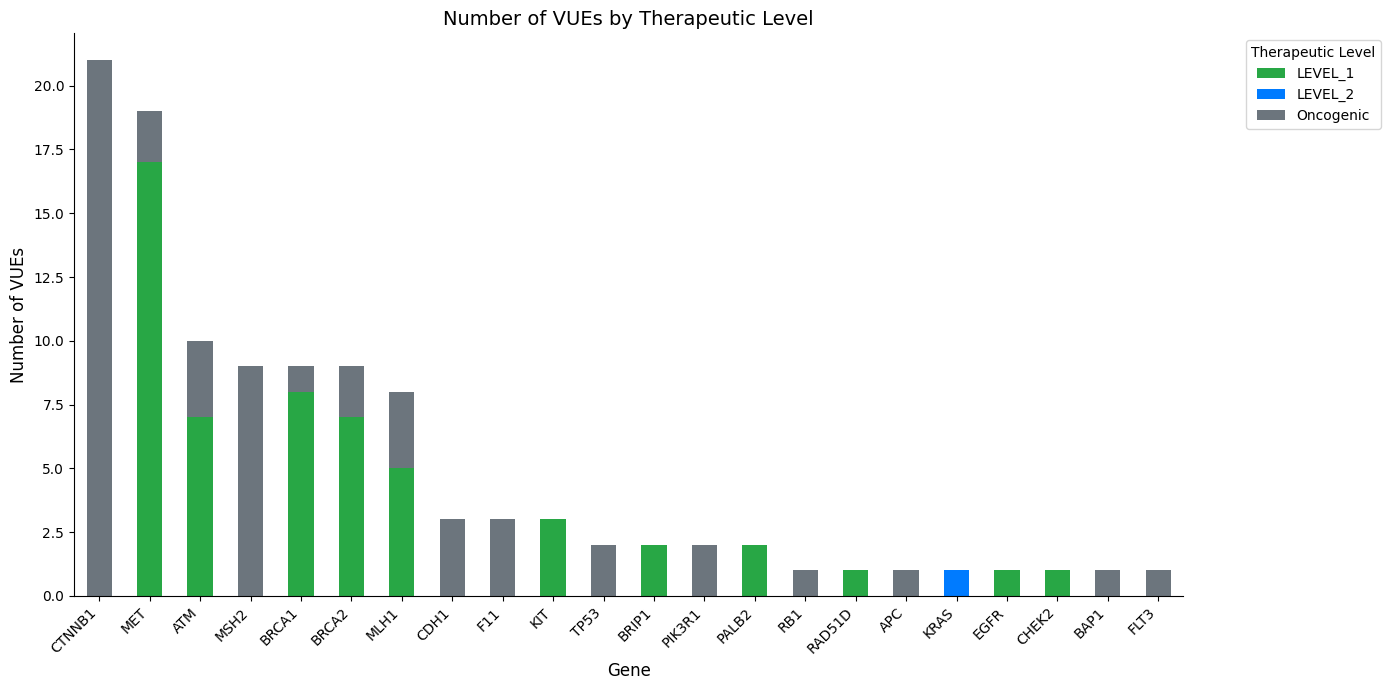

In [26]:
# Fill nulls with "Oncogenic"
result_df['therapeuticLevel'] = result_df['therapeuticLevel'].fillna('Oncogenic')

# Group by gene and therapeutic level → count VUEs
grouped_counts = result_df.groupby(['hugoGeneSymbol', 'therapeuticLevel']).size().unstack(fill_value=0)
# Sort genes by total number of VUEs
grouped_counts = grouped_counts.loc[grouped_counts.sum(axis=1).sort_values(ascending=False).index]

# Ensure consistent column order
level_palette = {
    'LEVEL_1': '#28a745',   # Green
    'LEVEL_2': '#007bff',   # Dark Blue
    'Oncogenic': '#6c757d'  # Gray
}
all_levels = list(level_palette.keys())
grouped_counts = grouped_counts.reindex(columns=all_levels, fill_value=0)

# Plot stacked bar chart
ax = grouped_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    color=[level_palette[level] for level in grouped_counts.columns]
)

# Plot formatting
plt.title(f"Number of VUEs by Therapeutic Level", fontsize=14)
plt.xlabel("Gene", fontsize=12)
plt.ylabel("Number of VUEs", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Therapeutic Level", bbox_to_anchor=(1.05, 1), loc="upper left")
sns.despine()
plt.tight_layout()
plt.show()





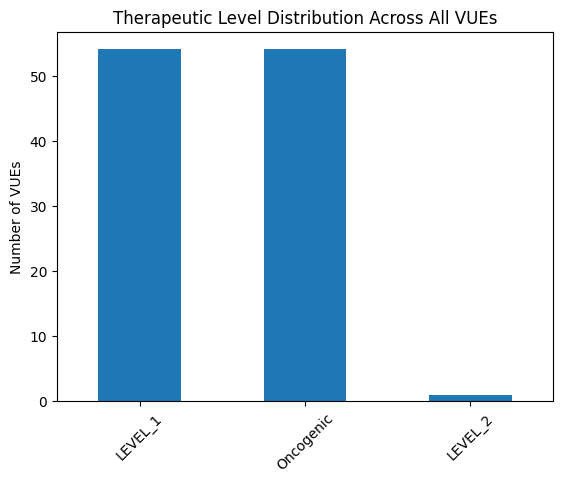

In [409]:
result_df['therapeuticLevel'].value_counts().plot(kind='bar')
plt.title("Therapeutic Level Distribution Across All VUEs")
plt.ylabel("Number of VUEs")
plt.xticks(rotation=45)
plt.show()

In [8]:
# create input for mutationmapper tool

# Create new DataFrame with the specified columns
new_data = {
    'Sample_ID': [],
    'Cancer_Type': [],
    'Chromosome': [],
    'Start_Position': [],
    'End_Position': [],
    'Reference_Allele': [],
    'Variant_Allele': []
}

# Fill in the new DataFrame
for location in result_df['genomicLocation']:
    try:
        chrom, start, end, ref, alt = location.split(',')
    except ValueError:
        continue
    new_data['Sample_ID'].append(f'Sample_{np.random.randint(1, 1000)}')
    new_data['Cancer_Type'].append(np.random.choice(['Lung', 'Breast', 'Colon', 'Prostate', 'Leukemia']))
    new_data['Chromosome'].append(chrom)
    new_data['Start_Position'].append(start)
    new_data['End_Position'].append(end)
    new_data['Reference_Allele'].append(ref)
    new_data['Variant_Allele'].append(alt)

new_df = pd.DataFrame(new_data)

# Copy the new DataFrame for pasting into MutationMapperTool
new_df.to_clipboard(index=False)
